In [1]:
## references:

"""A very simple MNIST classifier.
See extensive documentation at
http://tensorflow.org/tutorials/mnist/beginners/index.md
"""

"""
https://github.com/tensorflow/tensorflow/blob/r1.2/tensorflow/examples/tutorials/mnist/mnist_softmax.py
"""

import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from tensorflow.examples.tutorials.mnist import input_data

# Environments

In [2]:

"""
Please note, the environments for the codes.
"""

import platform

print(platform.linux_distribution())

print(platform.python_version())

print(tf.__version__)

print(np.__version__)

('Ubuntu', '14.04', 'trusty')
2.7.6
1.0.1
1.12.1


# Load Data

In [3]:
mnist = input_data.read_data_sets('./mnist', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [4]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print(mnist.test.images.shape)
print(mnist.test.labels.shape)

print(mnist.train.images.dtype)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
float32


In [5]:
img =  mnist.train.images[np.random.randint(0, 55000, size = 100), :].reshape(-1, 28, 28)
print(img.shape)

(100, 28, 28)


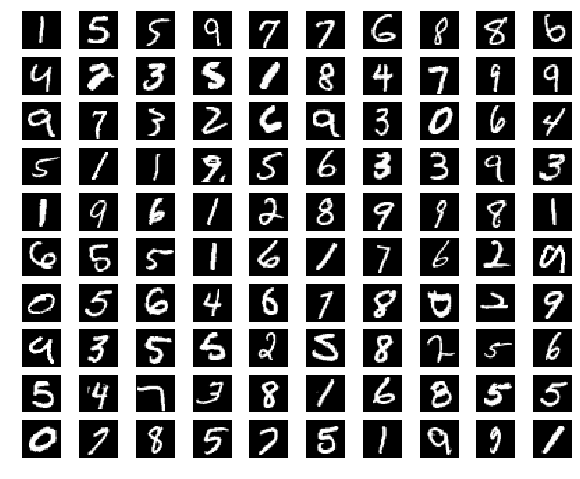

In [6]:
## refer to stanford cs231n assignment2 for the imshow_noax()
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')
    
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, i * 10 + j + 1)
        imshow_noax(img[i * 10 + j, :])
plt.show()

# Model

In [10]:
def beginners_model(X, y):
    
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y_out = tf.matmul(X, W) + b
        
    return y_out

# Graph

In [11]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

## loss
y_out = beginners_model(X, y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = y_out, labels = y)
mean_loss = tf.reduce_mean(cross_entropy)

## train
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(mean_loss) 

## test
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_out, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training

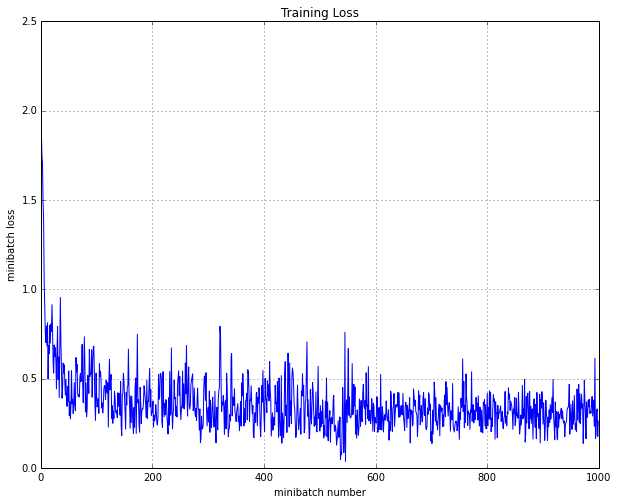

0.9198


In [13]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    losses = []
    for _ in range(1000): 
        batch_X, batch_y = mnist.train.next_batch(100)  
        
        loss, _ = sess.run([mean_loss, train_step], feed_dict={X: batch_X, y: batch_y})
        losses.append(loss)
        
    plt.plot(losses)
    plt.grid(True)
    plt.title('Training Loss')
    plt.xlabel('minibatch number')
    plt.ylabel('minibatch loss')
    plt.show()    
        
    feed_dict = {X: mnist.test.images, y: mnist.test.labels}
    test_acc = sess.run(accuracy, feed_dict = feed_dict)
        
    print(test_acc)